In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
fmri_img = '/home/finc/Dropbox/sub-02/ses-1/func/sub-02_ses-1_task-dualnback_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'
onsets_dir = '/home/finc/Dropbox/sub-02/onsets_dualnback.csv'

Specifying the experimental paradigm
------------------------------------

We must provide a description of the experiment, that is, define the
timing of the auditory stimulation and rest periods. According to
the documentation of the dataset, there were 16 42s blocks --- in
which 6 scans were acquired --- alternating between rest and
auditory stimulation, starting with rest. We use standard python
functions to create a pandas.DataFrame object that specifies the
timings:

In [4]:
tr = 2
n_scans = 340

events = pd.read_csv(onsets_dir)
events

,duration,onset,trial_type
0,4.0,0.0,intro
1,30.0,4.0,1-back
2,4.0,34.0,intro
3,30.0,38.0,2-back
4,4.0,68.0,intro
5,30.0,72.0,1-back
6,4.0,102.0,intro
7,30.0,106.0,2-back
8,4.0,136.0,intro
9,30.0,140.0,1-back


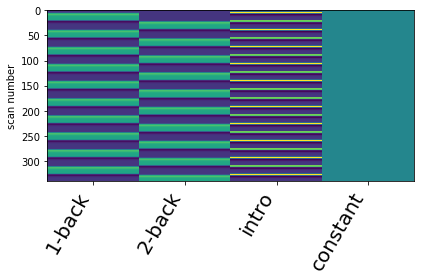

In [18]:
from nistats.first_level_model import FirstLevelModel

fmri_glm = FirstLevelModel(tr, drift_model = None)
fmri_glm = fmri_glm.fit(fmri_img, events)

from nistats.reporting import plot_design_matrix
design_matrix = fmri_glm.design_matrices_[0]
plot_design_matrix(design_matrix)

In [8]:
contrast_matrix = np.eye(design_matrix.shape[1])
contrasts = dict([(column, contrast_matrix[i])
                  for i, column in enumerate(design_matrix.columns)])
contrast_matrix

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

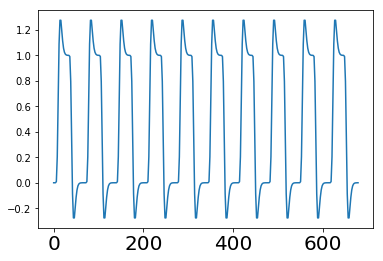

In [17]:
import matplotlib.pyplot as plt

plt.plot(design_matrix['1-back'])

In [34]:
active_minus_rest =  contrasts['2-back'] - contrasts['1-back']

eff_map = fmri_glm.compute_contrast(active_minus_rest,
                                    output_type='effect_size')

z_map = fmri_glm.compute_contrast(active_minus_rest,
                                  output_type='z_score')

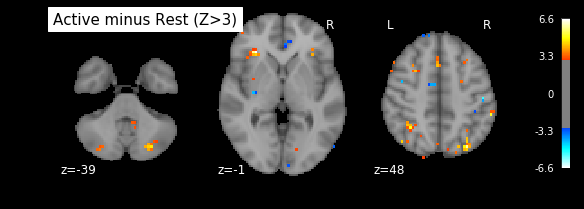

In [35]:
from nilearn.plotting import plot_stat_map, plot_anat, plot_img

plot_stat_map(z_map, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True,
              title='Active minus Rest (Z>3)')